<a href="https://colab.research.google.com/github/SusanmckDIT/Work-code/blob/master/DogCat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below you will find code to run a very simple Deep Learning example for training a model on the MNIST digits dataset. 

For further details have a look at the Tensorflow website from which this is based:
https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
## Step 1: Set up the data and take care of imports. 

In [ ]:
# import tensorflow library 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the data - keras only has a limited number of datasets preloaded 
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Step 2: Define the Training Process

In [ ]:
def run_training(model, epochs): 
  print(model.summary())

  base_learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_dataset,
                      epochs=epochs,
                      validation_data=validation_dataset)
  
  plt.plot(history.history['val_accuracy'])
  plt.title('Validation Accuracy over Training')
  plt.xlabel('Training Epochs')
  plt.ylabel('Accuracy')

  print("Final Validation Accuracy:",history.history['val_accuracy'][-1])

Step 3: Let's Try Training with a CNN model that we define from scratch. Please note that sometimes this model trains and sometimes it doesn't learn enough in the time we want to give it here. 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 82944)            

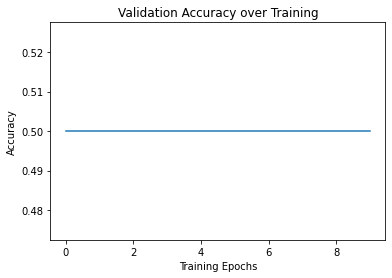

In [ ]:
# Build a CNN based model that we will use to learn classification from scratch
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

run_training(model,10)

Step 4: Let's try things with a model that is pre-trained (i.e., Transfer Learning) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_______________________________________________

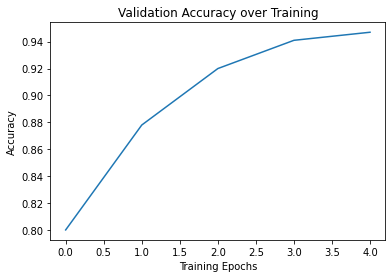

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

run_training(model,5)

Now just in case you think it is the difference in the architecture only that improves things, let's try the same architecture, but this time we randomise our weights intead of building on weights that were pre-trained on the popular imagenet dataset. 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
____________________________________________

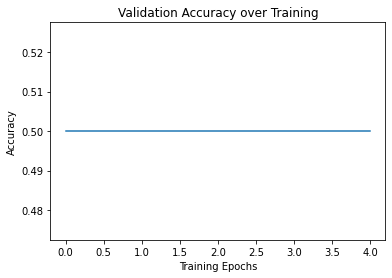

In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
base_model.trainable = True
x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

run_training(model,5)